In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

F:\python\kaggle\titanic


In [2]:
FILEPATH = "F:/python/datasets/Titanic"
train_path = os.path.join(FILEPATH, "train.csv")
test_path = os.path.join(FILEPATH, "test.csv")

In [3]:
import pandas as pd
train_raw = pd.read_csv(train_path)
test_raw = pd.read_csv(test_path)
column_names = train_raw.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_raw[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [6]:
# Name, Ticket　は影響が薄いと考えられるので除去する
# PassengerIDは単なるラベルなので訓練データに使わない
# Cabinのデータは紛失が多いため使えない
# Embarkedとの関連性があると仮定する
columns_to_remove = ["Name", "Cabin", "Ticket", "PassengerId"]
train_remove = train_raw.drop(columns_to_remove, axis=1)
test_remove = test_raw.drop(columns_to_remove, axis=1)
# PassengerIDは訓練後結果にConcatenatしてから提出する

In [7]:
train_remove[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train_remove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
# Imputerで紛失したデータを補完する
# 補完が必要なのは AgeとEmbarked
# Embarkedはpandasのfillnaで行う
train_remove.value_counts("Embarked")
# Sを基に補完する
column_to_fill="Embarked"
train_remove[column_to_fill] = train_remove[column_to_fill].fillna("S")

In [10]:
titanic_num = train_remove.drop(["Sex", "Embarked"], axis=1)

In [11]:
# Survivedを分割してX_trainとy_trainを作る
train_labels= titanic_num.values[:, 0]
titanic_num_train = titanic_num.drop(["Survived"], axis=1)

In [12]:
titanic_num_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
num_attribs=["Age", "SibSp", "Parch", "Fare", "Pclass"]
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
titanic_num_tr = num_pipeline.fit_transform(titanic_num_train )

cat_attribs = ["Embarked", "Sex"] #cat_attribsはカテゴリーの変数、つまり列の名字を代入している

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
train_prepared = full_pipeline.fit_transform(train_remove)

In [14]:
pd.DataFrame(train_prepared)

,0,1,2,3,4,5,6,7,8,9
0,-0.565736,0.432793,-0.473674,-0.502445,0.827377,0.0,0.0,1.0,0.0,1.0
1,0.663861,0.432793,-0.473674,0.786845,-1.566107,1.0,0.0,0.0,1.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,0.827377,0.0,0.0,1.0,1.0,0.0
3,0.433312,0.432793,-0.473674,0.420730,-1.566107,0.0,0.0,1.0,1.0,0.0
4,0.433312,-0.474545,-0.473674,-0.486337,0.827377,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,-0.369365,0.0,0.0,1.0,0.0,1.0
887,-0.796286,-0.474545,-0.473674,-0.044381,-1.566107,0.0,0.0,1.0,1.0,0.0
888,-0.104637,0.432793,2.008933,-0.176263,0.827377,0.0,0.0,1.0,1.0,0.0
889,-0.258337,-0.474545,-0.473674,-0.044381,-1.566107,1.0,0.0,0.0,0.0,1.0


In [15]:
train_prepared.shape

(891, 10)

In [127]:
X_train = train_prepared
y_train = train_labels

In [49]:
X_train = train_prepared[100:]
y_train = train_labels[100:]
X_valid = train_prepared[:100]
y_valid = train_labels[:100]

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm import tqdm


random_forest = RandomForestClassifier(n_estimators = 200)
svm = SVC(C=0.1,kernel='linear', probability=True)
logistic_regression = LogisticRegression(C=1)

# VotingClassifierの作成
ensemble_model = VotingClassifier(
    estimators=[('rf', random_forest), ('svm', svm), ('lr', logistic_regression)],
    voting='soft'  # ソフト投票による多数決
)

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.92


In [106]:
del ensemble_model

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [35]:
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [36]:

keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[10]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=8)
expon_lr = ExponentialLearningRate(factor=1.002)
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"], loss="sparse_categorical_crossentropy")
histroy = model.fit(X_train, y_train, epochs=60,batch_size=16,
                    validation_data=(X_valid, y_valid),
                   callbacks=[expon_lr])
# validation_data=(X_valid, y_valid)
# callbacks=[early_stopping_cb]

Epoch 1/60
47/47 [==============================] - 1s 13ms/step - loss: 0.4994 - accuracy: 0.7463 - val_loss: 0.5167 - val_accuracy: 0.7467
Epoch 2/60
47/47 [==============================] - 0s 7ms/step - loss: 0.4101 - accuracy: 0.8232 - val_loss: 0.4817 - val_accuracy: 0.7800
Epoch 3/60
47/47 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8354 - val_loss: 0.4995 - val_accuracy: 0.7733
Epoch 4/60
47/47 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8232 - val_loss: 0.4782 - val_accuracy: 0.7733
Epoch 5/60
47/47 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8421 - val_loss: 0.4584 - val_accuracy: 0.8133
Epoch 6/60
47/47 [==============================] - 0s 8ms/step - loss: 0.3846 - accuracy: 0.8394 - val_loss: 0.4899 - val_accuracy: 0.7733
Epoch 7/60
47/47 [==============================] - 1s 11ms/step - loss: 0.3824 - accuracy: 0.8408 - val_loss: 0.4652 - val_accuracy: 0.8200
Epoch 8/60
47/47 [

Epoch 59/60
47/47 [==============================] - 1s 17ms/step - loss: 0.7226 - accuracy: 0.5425 - val_loss: 0.6521 - val_accuracy: 0.6467
Epoch 60/60
47/47 [==============================] - 1s 15ms/step - loss: 0.6789 - accuracy: 0.5938 - val_loss: 0.6513 - val_accuracy: 0.6467


Text(0, 0.5, 'Loss')

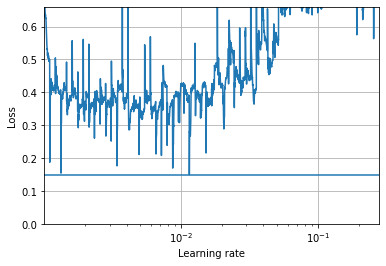

In [37]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [77]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[10]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
checkpoint_path = 'best_model.h5'
checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"], loss="sparse_categorical_crossentropy")
histroy = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb, checkpoint_callback])

Epoch 1/40
24/24 [==============================] - 1s 12ms/step - loss: 0.6678 - accuracy: 0.6167 - val_loss: 0.6303 - val_accuracy: 0.6800
Epoch 2/40
24/24 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7571 - val_loss: 0.5821 - val_accuracy: 0.7067
Epoch 3/40
24/24 [==============================] - 0s 5ms/step - loss: 0.5120 - accuracy: 0.7841 - val_loss: 0.5500 - val_accuracy: 0.7267
Epoch 4/40
24/24 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.8057 - val_loss: 0.5292 - val_accuracy: 0.7333
Epoch 5/40
24/24 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.8205 - val_loss: 0.5125 - val_accuracy: 0.7733
Epoch 6/40
24/24 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8232 - val_loss: 0.4937 - val_accuracy: 0.8000
Epoch 7/40
24/24 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8340 - val_loss: 0.4950 - val_accuracy: 0.7933
Epoch 8/40
24/24 [=

In [27]:
model.predict(X_train)

27/27 [==============================] - 0s 1ms/step


array([[0.9473885 , 0.05261152],
       [0.8903099 , 0.10969015],
       [0.00820275, 0.9917972 ],
       ...,
       [0.7978872 , 0.20211275],
       [0.6102668 , 0.3897332 ],
       [0.920314  , 0.07968602]], dtype=float32)

In [63]:
X_train = train_prepared
y_train = train_labels
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[10]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.008),
              metrics=["accuracy"], loss="sparse_categorical_crossentropy")
histroy = model.fit(X_train, y_train, epochs=15)
model.save("best_model.h5")

Epoch 1/15
28/28 [==============================] - 1s 4ms/step - loss: 0.5957 - accuracy: 0.7699
Epoch 2/15
28/28 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8182
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8081
Epoch 4/15
28/28 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8373
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8328
Epoch 6/15
28/28 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8238
Epoch 7/15
28/28 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8193
Epoch 8/15
28/28 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8316
Epoch 9/15
28/28 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8305
Epoch 10/15
28/28 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8395
Epoch 11/15
28/28 [

In [27]:
model = tf.keras.models.load_model("best_model.h5")

In [54]:
# TestDataをpreprocess
column_to_fill="Embarked"
test_remove[column_to_fill] = test_remove[column_to_fill].fillna("S")

In [55]:
titanic_num_test = test_remove.drop(["Sex", "Embarked"], axis=1)

In [56]:
num_attribs=["Age", "SibSp", "Parch", "Fare", "Pclass"]
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
titanic_num_tr = num_pipeline.fit_transform(titanic_num_test )

cat_attribs = ["Embarked", "Sex"] #cat_attribsはカテゴリーの変数、つまり列の名字を代入している

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
test_prepared = full_pipeline.fit_transform(test_remove)

In [57]:
pd.DataFrame(test_prepared)

,0,1,2,3,4,5,6,7,8,9
0,0.386231,-0.499470,-0.400248,-0.497413,0.873482,0.0,1.0,0.0,0.0,1.0
1,1.371370,0.616992,-0.400248,-0.512278,0.873482,0.0,0.0,1.0,1.0,0.0
2,2.553537,-0.499470,-0.400248,-0.464100,-0.315819,0.0,1.0,0.0,0.0,1.0
3,-0.204852,-0.499470,-0.400248,-0.482475,0.873482,0.0,0.0,1.0,0.0,1.0
4,-0.598908,0.616992,0.619896,-0.417492,0.873482,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,-0.204852,-0.499470,-0.400248,-0.493455,0.873482,0.0,0.0,1.0,0.0,1.0
414,0.740881,-0.499470,-0.400248,1.314435,-1.505120,1.0,0.0,0.0,1.0,0.0
415,0.701476,-0.499470,-0.400248,-0.507796,0.873482,0.0,0.0,1.0,0.0,1.0
416,-0.204852,-0.499470,-0.400248,-0.493455,0.873482,0.0,0.0,1.0,0.0,1.0


In [129]:
prediction = ensemble_model.predict(test_prepared)

In [130]:
prediction = model.predict(test_prepared)

In [131]:
prediction.shape

(418,)

In [132]:
import numpy as np
prediction = prediction.astype(np.int64)

In [35]:
ans = []
for i in range(prediction.shape[0]):
    ans.append(np.argmax(prediction[i]))
    

In [49]:
ans = np.array(ans)

In [133]:
ID = test_raw["PassengerId"]
ids  =np.array(ID)

In [134]:
answers = np.vstack((ids, prediction)).T

In [135]:
answers

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    1],
       [ 896,    0],
       [ 897,    0],
       [ 898,    0],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    1],
       [ 910,    0],
       [ 911,    1],
       [ 912,    1],
       [ 913,    1],
       [ 914,    1],
       [ 915,    1],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    1],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    1],
       [ 925,    0],
       [ 926,    0],
       [ 927,    1],
       [ 928,    1],
       [ 929,    0],
       [ 930,    0],
       [ 931,    1],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [136]:
did